<a href="https://colab.research.google.com/github/BerniceJewel/Machine-Learning-with-Applications-in-Finance---Linear-Regression/blob/main/Machine_Learning_with_Applications_in_Finance_Classifications_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chap.4: Classification Q.13 (parts a-d)**

In [ ]:
PIP = !pip install ISLP

In [ ]:
import numpy as np
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)
from ISLP import confusion_table
from sklearn.discriminant_analysis import \
    (LinearDiscriminantAnalysis as LDA,
     QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Weekly percentage returns for the S&P 500 stock index between 1990 and 2010.

**Year:** The year that the observation was recorded

**Lag1:** Percentage return for previous week

**Lag2:** Percentage return for 2 weeks previous

**Lag3:** Percentage return for 3 weeks previous

**Lag4:** Percentage return for 4 weeks previous

**Lag5:** Percentage return for 5 weeks previous

**Volume:** Volume of shares traded (average number of daily shares traded in billions)

**Today:** Percentage return for this week

**Direction:**  A factor with levels ‘Down’ and ‘Up’ indicating whether the market had a positive or negative return on a given week.



**a.   Numerical and graphical summary of stock market data set**



In [ ]:
Weekly = load_data('Weekly')

In [ ]:
print(Weekly.head(30))


    Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0   1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1   1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2   1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3   1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4   1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up
5   1990  1.178  0.712  3.514 -2.576 -0.270  0.154444 -1.372      Down
6   1990 -1.372  1.178  0.712  3.514 -2.576  0.151722  0.807        Up
7   1990  0.807 -1.372  1.178  0.712  3.514  0.132310  0.041        Up
8   1990  0.041  0.807 -1.372  1.178  0.712  0.143972  1.253        Up
9   1990  1.253  0.041  0.807 -1.372  1.178  0.133635 -2.678      Down
10  1990 -2.678  1.253  0.041  0.807 -1.372  0.149024 -1.793      Down
11  1990 -1.793 -2.678  1.253  0.041  0.807  0.135790  2.820        Up
12  1990  2.820 -1.793 -2.678  1.253  0.041  0.139898  4.022        Up
13  19

In [ ]:
Weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [ ]:
Weekly.corr(numeric_only=True)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


Do there appear to be any patterns?
**There does not appear to be any strong correlations between any of the variables other than year and volume as depicted in the graph below.**

<Axes: >

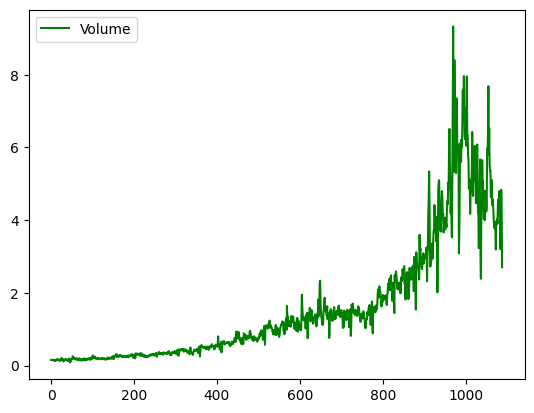

In [ ]:
Weekly.plot(y='Volume',color = 'green')

**b. Logistic regression with Direction as response, using 5Lag Variables and Volume as Predictors**

In [ ]:
allvars = Weekly.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
X = design.fit_transform(Weekly)
y = Weekly.Direction == 'Up'
glm = sm.GLM(y,
             X,
             family=sm.families.Binomial())
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538



The predictor **Lag2** ***appears to be statistically significant***, with a positive coefficient.

**c. Confusion matrix and overall fraction of correct
 predictions.**

In [ ]:
probs = results.predict()

In [ ]:
labels = np.array(['Down']*1089)
labels[probs > 0.5] = 'Up'

In [ ]:
confusion_table(labels, Weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [ ]:
(54+557)/1089, np.mean(labels == Weekly.Direction)


(0.5610651974288338, 0.5610651974288338)


We've correctly classified approximately 56% of the training observations.

False negative rate of 48/(48+54) = 47%

False positive rate of 430/(430+557) = 44%

False positive is bad since we predict the market is up when in fact it is down. This could be a lot of money lost on bad bets.

In [ ]:
48/(48+54)

0.47058823529411764

In [ ]:
430/(430+557)

0.43566362715298884

d.   Logistic Regression using training period 1990 to 2008 with only Lag2 as predictor. Compute Confusion Matrix and overall fraction of correct predictions for test data 2009, 2010.



In [ ]:
train = (Weekly.Year < 2009)

In [ ]:
D = Weekly.Direction
L_train, L_test = D.loc[train], D.loc[~train]

In [ ]:
model = MS(['Lag2']).fit(Weekly)

In [ ]:
X = model.transform(Weekly)
y = Weekly.Direction == 'Up'

In [ ]:
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train,
                   X_train,
                   family=sm.families.Binomial())
results = glm_train.fit()
probs = results.predict(exog=X_test)
labels = np.array(['Down']*104)
labels[probs>0.5] = 'Up'
confusion_table(labels, L_test)

Truth,Down,Up
Predicted,,
Down,9,5
Up,34,56


In [ ]:
(9+56)/104, np.mean(labels == L_test)

#Overall fraction of correct predictions is (9+56)/104 = 62.5%

(0.625, 0.625)